In [1]:
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Ver con glob para carpeta local
df= pd.read_csv('DEN_2020.csv', sep=';')

In [3]:
#Cantidad de Departamentos, Distritos y Provincias
df["Dep-Prov-Distrito"] = df["Departamento"] + ", " + df["Provincia"] + ", " + df["Distrito"]
df["Dep-Prov"] = df["Departamento"] + ", " + df["Provincia"]
print("La cantidad de departamentos es:", df['Departamento'].nunique())
n=df['Dep-Prov-Distrito'].nunique()
print("La cantidad de distritos es:", df['Dep-Prov-Distrito'].nunique())
print("La cantidad de provincias es:", df['Dep-Prov'].nunique())

La cantidad de departamentos es: 20
La cantidad de distritos es: 376
La cantidad de provincias es: 89


In [4]:
df = df[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'numero_casos','Casos', 'Año']] 
df1 = df[['Dep-Prov-Distrito', 'Distrito', 'Semana', 'Casos']] 
listaDistrito = df['Dep-Prov-Distrito'].tolist()
listaDistrito = list(dict.fromkeys(listaDistrito))
print(listaDistrito)
i=0
for dis in listaDistrito:
    df1.loc[df1['Dep-Prov-Distrito']==dis,'ID_distrito']=i
    i=i+1

['LAMBAYEQUE, LAMBAYEQUE, LAMBAYEQUE', 'CUSCO, LA CONVENCION, PICHARI', 'SAN MARTIN, SAN MARTIN, HUIMBAYOC', 'LIMA, LIMA, RIMAC', 'LORETO, MAYNAS, ALTO NANAY', 'SAN MARTIN, MOYOBAMBA, CALZADA', 'PUNO, CARABAYA, SAN GABAN', 'CUSCO, QUISPICANCHI, CAMANTI', 'JUNIN, SATIPO, MAZAMARI', 'SAN MARTIN, MOYOBAMBA, HABANA', 'LORETO, MARISCAL RAMON CASTILLA, SAN PABLO', 'SAN MARTIN, LAMAS, LAMAS', 'LAMBAYEQUE, CHICLAYO, LA VICTORIA', 'AMAZONAS, UTCUBAMBA, CAJARURO', 'CAJAMARCA, JAEN, COLASAY', 'AYACUCHO, LA MAR, SANTA ROSA', 'LORETO, REQUENA, JENARO HERRERA', 'LAMBAYEQUE, CHICLAYO, JOSE LEONARDO ORTIZ', 'AREQUIPA, CARAVELI, BELLA UNION', 'UCAYALI, ATALAYA, SEPAHUA', 'JUNIN, HUANCAYO, SAPALLANGA', 'LIMA, LIMA, LOS OLIVOS', 'HUANUCO, PUERTO INCA, PUERTO INCA', 'LORETO, MAYNAS, NAPO', 'CUSCO, LA CONVENCION, MEGANTONI', 'LORETO, PUTUMAYO, TENIENTE MANUEL CLAVERO', 'SAN MARTIN, LAMAS, TABALOSOS', 'ICA, CHINCHA, EL CARMEN', 'UCAYALI, PADRE ABAD, NESHUYA', 'MADRE DE DIOS, TAMBOPATA, LAS PIEDRAS', 'LORETO

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


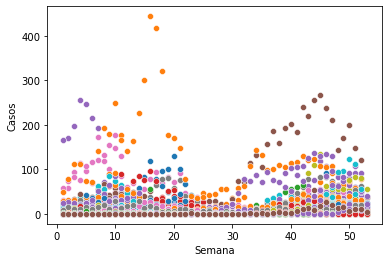

In [5]:
timeSeries = pd.DataFrame()
#listaDistrito = listaDistrito[0:15]
for dis in listaDistrito:
    distrito=df[df['Dep-Prov-Distrito']==dis]
    distrito.sort_values(['Semana'], ascending = True)
    distrito = distrito.reset_index(drop=True)
    distrito = distrito.replace('nan', np.nan).fillna(0.000001)
    distrito = distrito.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    timeSeries = timeSeries.append(distrito['Casos'], ignore_index=True)
    #print(dis)
    ax = sns.scatterplot(y=distrito['Casos'], x= distrito['Semana'])
plt.show()

In [6]:
from tsfresh import extract_features

#features extraction
extracted_features = extract_features(df1, column_id='ID_distrito', column_sort='Semana', column_value='Casos')
extracted_features

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:10<00:00,  1.83it/s]


,Casos__variance_larger_than_standard_deviation,Casos__has_duplicate_max,Casos__has_duplicate_min,Casos__has_duplicate,Casos__sum_values,Casos__abs_energy,Casos__mean_abs_change,Casos__mean_change,Casos__mean_second_derivative_central,Casos__median,...,Casos__permutation_entropy__dimension_6__tau_1,Casos__permutation_entropy__dimension_7__tau_1,Casos__query_similarity_count__query_None__threshold_0.0,"Casos__matrix_profile__feature_""min""__threshold_0.98","Casos__matrix_profile__feature_""max""__threshold_0.98","Casos__matrix_profile__feature_""mean""__threshold_0.98","Casos__matrix_profile__feature_""median""__threshold_0.98","Casos__matrix_profile__feature_""25""__threshold_0.98","Casos__matrix_profile__feature_""75""__threshold_0.98",Casos__mean_n_absolute_max__number_of_maxima_7
0.0,0.0,1.0,1.0,1.0,3.0,3.0,0.115385,0.000000,0.000000,0.0,...,0.865676,0.978014,NaN,3.996667,7.505553,6.743109,7.416348,7.416348,7.416348,0.428571
1.0,1.0,0.0,1.0,1.0,1210.0,57756.0,9.153846,0.076923,-0.019608,14.0,...,3.697914,3.850148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.428571
2.0,0.0,0.0,1.0,1.0,1.0,1.0,0.038462,0.000000,0.000000,0.0,...,0.501793,0.610649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857
3.0,0.0,0.0,1.0,1.0,1.0,1.0,0.038462,0.000000,0.000000,0.0,...,0.501793,0.610649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142857
4.0,0.0,0.0,1.0,1.0,11.0,21.0,0.346154,0.000000,0.000000,0.0,...,1.531829,1.649675,NaN,2.567184,4.472136,3.883626,4.472136,3.139570,4.472136,1.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371.0,0.0,0.0,1.0,1.0,3.0,5.0,0.115385,0.000000,-0.009804,0.0,...,0.641429,0.751180,NaN,4.898979,4.898979,4.898979,4.898979,4.898979,4.898979,0.428571
372.0,1.0,0.0,1.0,1.0,49.0,145.0,0.903846,-0.057692,0.029412,0.0,...,2.761183,2.963720,NaN,1.224415,5.291503,3.139015,3.049150,2.986435,3.646653,3.571429
373.0,1.0,0.0,1.0,1.0,56.0,556.0,1.115385,0.000000,0.000000,0.0,...,1.793323,1.998576,NaN,1.563185,5.291503,2.900197,2.156035,2.082158,3.546761,7.142857
374.0,1.0,0.0,1.0,1.0,79.0,937.0,0.961538,0.423077,0.137255,0.0,...,2.494174,2.735751,NaN,1.508627,5.291503,2.864085,2.996289,2.348299,2.996289,9.857143


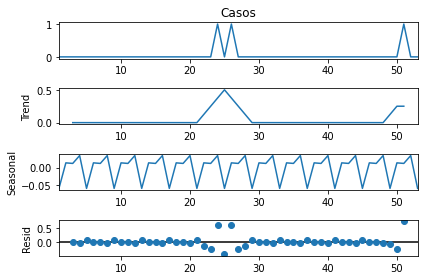

In [7]:
import tsfresh
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
Trend=[]
Season=[]
for dis in listaDistrito[:1]:
    distrito=df1[df1['Dep-Prov-Distrito']==dis]
    distrito = distrito.sort_values(['Semana'], ascending = True)
    distrito = distrito.set_index('Semana', drop=True)
    #distrito = distrito.replace('nan', np.nan).fillna(0.000001)
    #distrito = distrito.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    #print(df2)
    result = seasonal_decompose(distrito['Casos'], model='additive', period=4)
    result.plot()
    #print(result.trend.values)
    Trend.append(result.trend.values.tolist())
    Season.append(result.seasonal.values.tolist())
    #pyplot.show()



In [8]:
features = pd.DataFrame()
Mean=[]
Var=[]
aCF1=[]
#Trend=[]
Linearity=[]
Curvature=[]
#Season=[]
Peak=[]
Entropy=[]
Lumpiness=[]
Lshift=[]
Vchange=[]
Fspots=[]
Cpoints=[]
Klscore=[]
ChangeIdx=[]

In [9]:
for dis in listaDistrito:
    distrito_1=df['Dep-Prov-Distrito']==dis
    casos_distrito1=df[distrito_1]
    casos_distrito1 = casos_distrito1.reset_index(drop=True)
    casos_distrito1 = casos_distrito1['Casos']
    casos_distrito1 = casos_distrito1.replace('nan', np.nan).fillna(0.000001)
    casos_distrito1 = casos_distrito1.replace(0, np.nan).fillna(0.000001)
    casos_distrito1 = casos_distrito1.replace('nan', np.nan).fillna(0.000001)
    casos_distrito1 = casos_distrito1.replace([np.inf, -np.inf], np.nan).fillna(0.000001)
    #Features
    mean=tsfresh.feature_extraction.feature_calculators.mean(casos_distrito1)
    var=tsfresh.feature_extraction.feature_calculators.variance(casos_distrito1)
    ACF1=tsfresh.feature_extraction.feature_calculators.autocorrelation(casos_distrito1,1)
    #trend=
    #linear_trend=tsfresh.feature_extraction.feature_calculators.linear_trend(casos_distrito1, {"attr": 'Casos'})
    #curv=
    peak=tsfresh.feature_extraction.feature_calculators.number_peaks(casos_distrito1,20)
    entropy=tsfresh.feature_extraction.feature_calculators.sample_entropy(casos_distrito1)
    #lump = tsfresh.feature_extraction.feature_calculators.variation_coefficient(casos_distrito1)
    cpoints=tsfresh.feature_extraction.feature_calculators.number_crossing_m(casos_distrito1,5)
    Mean.append(mean)
    Var.append(var)
    aCF1.append(ACF1)
    Peak.append(peak)
    Entropy.append(entropy)
    Cpoints.append(cpoints)

In [10]:
#Season

In [11]:
#Mean

In [10]:
data_tuples = list(zip(Mean,Var,aCF1, Peak,Entropy,Cpoints))
features = pd.DataFrame(data_tuples, columns =['Mean', 'Var', 'ACF1','Peak','Entropy','Cpoints']) 
# print the data 
features

,Mean,Var,ACF1,Peak,Entropy,Cpoints
0,0.056605,0.053400,0.678333,0,0.042523,0
1,22.830189,568.518330,0.691080,0,0.414434,5
2,0.018869,0.018512,-0.000370,0,0.040005,0
3,0.018869,0.018512,-0.000370,0,0.040005,0
4,0.207548,0.353150,0.669607,0,0.046424,0
...,...,...,...,...,...,...
371,0.056605,0.091136,0.409405,0,0.040822,0
372,0.924529,1.881095,0.576490,0,0.160968,1
373,1.056605,9.374153,0.512434,0,0.057550,1
374,1.490567,15.457456,0.578282,0,0.060995,1


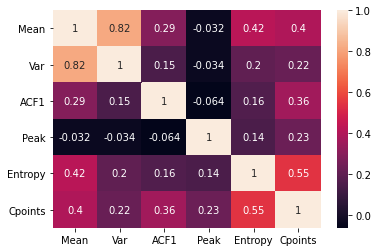

In [13]:
corr_df = features.corr()
#print("The correlation DataFrame is:")
#print(corr_df, "\n")
sns.heatmap(corr_df, annot=True)
plt.show()

# Funciones de Distancias

In [11]:
import math
from math import sqrt, log, floor
from sklearn.metrics import mean_squared_error
from statistics import mean
from fastdtw import fastdtw
from scipy import stats
from scipy.spatial.distance import pdist

#Euclidean
def euclidean(x, y):
    r=np.linalg.norm(x-y)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Fast Dynamic time warping
def fast_DTW(x, y):
    r, _ = fastdtw(x, y, dist=euclidean)
    if math.isnan(r):
        r=1
    #print(r)
    return r

#Spearman
def scorr(x, y):
    r = stats.spearmanr(x, y)[0]
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

#RMSE
def rmse(x, y):
    r=sqrt(mean_squared_error(x,y))
    if math.isnan(r):
        r=1
    #print(r)
    return r

def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

#Correlation
def corr(x, y):
    r=np.dot(x-mean(x),y-mean(y))/((np.linalg.norm(x-mean(x)))*(np.linalg.norm(y-mean(y))))
    if math.isnan(r):
        r=0
    #print(r)
    return 1 - r

In [12]:
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score

DIAMETER_METHODS = ['mean_cluster', 'farthest']
CLUSTER_DISTANCE_METHODS = ['nearest', 'farthest']

def inter_cluster_distances(labels, distances, method='nearest'):
    """Calculates the distances between the two nearest points of each cluster.
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: `nearest` for the distances between the two nearest points in each cluster, or `farthest`
    """
    if method not in CLUSTER_DISTANCE_METHODS:
        raise ValueError(
            'method must be one of {}'.format(CLUSTER_DISTANCE_METHODS))

    if method == 'nearest':
        return __cluster_distances_by_points(labels, distances)
    elif method == 'farthest':
        return __cluster_distances_by_points(labels, distances, farthest=True)


def __cluster_distances_by_points(labels, distances, farthest=False):
    n_unique_labels = len(np.unique(labels))
    cluster_distances = np.full((n_unique_labels, n_unique_labels),
                                float('inf') if not farthest else 0)

    np.fill_diagonal(cluster_distances, 0)

    for i in np.arange(0, len(labels) - 1):
        for ii in np.arange(i, len(labels)):
            if labels[i] != labels[ii] and (
                (not farthest and
                 distances[i, ii] < cluster_distances[labels[i], labels[ii]])
                    or
                (farthest and
                 distances[i, ii] > cluster_distances[labels[i], labels[ii]])):
                cluster_distances[labels[i], labels[ii]] = cluster_distances[
                    labels[ii], labels[i]] = distances[i, ii]
    return cluster_distances


def diameter(labels, distances, method='farthest'):
    """Calculates cluster diameters
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param method: either `mean_cluster` for the mean distance between all elements in each cluster, or `farthest` for the distance between the two points furthest from each other
    """
    if method not in DIAMETER_METHODS:
        raise ValueError('method must be one of {}'.format(DIAMETER_METHODS))

    n_clusters = len(np.unique(labels))
    diameters = np.zeros(n_clusters)

    if method == 'mean_cluster':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii]:
                    diameters[labels[i]] += distances[i, ii]

        for i in range(len(diameters)):
            diameters[i] /= sum(labels == i)

    elif method == 'farthest':
        for i in range(0, len(labels) - 1):
            for ii in range(i + 1, len(labels)):
                if labels[i] == labels[ii] and distances[i, ii] > diameters[
                        labels[i]]:
                    diameters[labels[i]] = distances[i, ii]
    return diameters

def dunn(labels, distances, diameter_method='farthest',
         cdist_method='nearest'):
    """
    Dunn index for cluster validation (larger is better).
    
    .. math:: D = \\min_{i = 1 \\ldots n_c; j = i + 1\ldots n_c} \\left\\lbrace \\frac{d \\left( c_i,c_j \\right)}{\\max_{k = 1 \\ldots n_c} \\left(diam \\left(c_k \\right) \\right)} \\right\\rbrace
    
    where :math:`d(c_i,c_j)` represents the distance between
    clusters :math:`c_i` and :math:`c_j`, and :math:`diam(c_k)` is the diameter of cluster :math:`c_k`.
    Inter-cluster distance can be defined in many ways, such as the distance between cluster centroids or between their closest elements. Cluster diameter can be defined as the mean distance between all elements in the cluster, between all elements to the cluster centroid, or as the distance between the two furthest elements.
    The higher the value of the resulting Dunn index, the better the clustering
    result is considered, since higher values indicate that clusters are
    compact (small :math:`diam(c_k)`) and far apart (large :math:`d \\left( c_i,c_j \\right)`).
    :param labels: a list containing cluster labels for each of the n elements
    :param distances: an n x n numpy.array containing the pairwise distances between elements
    :param diameter_method: see :py:function:`diameter` `method` parameter
    :param cdist_method: see :py:function:`diameter` `method` parameter
    
    .. [Kovacs2005] Kovács, F., Legány, C., & Babos, A. (2005). Cluster validity measurement techniques. 6th International Symposium of Hungarian Researchers on Computational Intelligence.
    """

    labels = LabelEncoder().fit(labels).transform(labels)
    
    

    ic_distances = inter_cluster_distances(labels, distances, cdist_method)
    #print("IC",ic_distances)
    if len(ic_distances[ic_distances.nonzero()])==0:
        min_distance = 0
    else:
        min_distance = min(ic_distances[ic_distances.nonzero()])
    max_diameter = max(diameter(labels, distances, diameter_method))
    
    

    return min_distance / max_diameter

# Distancias

HAC + euclidian distance: 
SC:  0.9221687860985464
CHZ:  8328.470972975416
DUNN:  1.2571939191237373
HAC + corr distance: 
SC:  0.6244728361767896
CHZ:  954.2402870472717
DUNN:  1.153796180490896
HAC + scorr distance: 
SC:  0.9151874591731041
CHZ:  2240.461143042174
DUNN:  1.4285714285714286
HAC + dtw distance: 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


SC:  0.9202413673716238
CHZ:  8259.10869800107
DUNN:  1.2584815090291104
HAC + euclidian distance: 
SC:  0.7113487677115279
CHZ:  2090.2129969740854
DUNN:  0.5858992004368994
HAC + corr distance: 
SC:  0.6305338260355116
CHZ:  1204.2006160009212
DUNN:  1.3732049443217456
HAC + scorr distance: 
SC:  0.8446272565090681
CHZ:  2248.6664117097616
DUNN:  1.4285714285714286
HAC + dtw distance: 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


SC:  0.6274850895649382
CHZ:  1562.2451712459626
DUNN:  0.19025120547323587
HAC + euclidian distance: 
SC:  0.922051225449766
CHZ:  8318.329870584223
DUNN:  1.2567174511610406
HAC + corr distance: 
SC:  0.6495873096207919
CHZ:  1456.0873823403113
DUNN:  1.920160968875006
HAC + scorr distance: 
SC:  0.930289408641481
CHZ:  4262.619429195414
DUNN:  1.696040219990327


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


HAC + dtw distance: 
SC:  0.9190425909289748
CHZ:  7935.550795127403
DUNN:  1.2498869752440045
HAC + euclidian distance: 
SC:  0.9220880858251809
CHZ:  8321.32356018871
DUNN:  1.2567174433170336
HAC + corr distance: 
SC:  0.6640505154634464
CHZ:  1466.601035280474
DUNN:  1.5040838619916908
HAC + scorr distance: 
SC:  0.7969629447274794
CHZ:  2769.6735582471742
DUNN:  1.4285714285714286


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


HAC + dtw distance: 
SC:  0.9188973237731387
CHZ:  7931.868240724682
DUNN:  1.2479734192080096
HAC + euclidian distance: 
SC:  0.9220955146598531
CHZ:  8322.095506363754
DUNN:  1.2567179252601608
HAC + corr distance: 
SC:  0.6494351068146085
CHZ:  1126.5263623866717
DUNN:  1.5657571726349369
HAC + scorr distance: 
SC:  0.7974734158912169
CHZ:  1322.2687286595803
DUNN:  1.4285714285714286


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


HAC + dtw distance: 
SC:  0.9189209704730524
CHZ:  7937.234498674175
DUNN:  1.2490344228667059
HAC + euclidian distance: 
SC:  0.9222698306150838
CHZ:  8311.647609112539
DUNN:  1.2567225461153082
HAC + corr distance: 
SC:  0.6630793277389525
CHZ:  1594.1673187875112
DUNN:  1.344302435145781
HAC + scorr distance: 
SC:  0.8784084813098031
CHZ:  1640.080932530072
DUNN:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:826: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


HAC + dtw distance: 
SC:  0.9205823524396851
CHZ:  7979.21833106077
DUNN:  1.2500465935422471


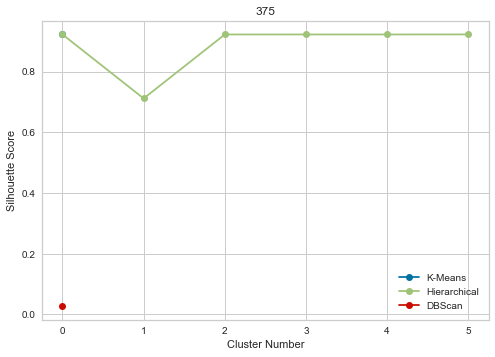

In [46]:
import matplotlib.pyplot as plt
HAC_EUCLIDEAN=[]
HAC_CORRELATION=[]
HAC_SPEARMAN=[]
HAC_DTW=[]
k=7
for i in list(range(6)):
    features2 = features.drop(features.columns[i], axis=1)
    #Euclidean
    f_euclidean_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(1,n):
            #print("j",j)
            f_euclidean_dist[i,j] = euclidean(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())

    #Corr
    corr_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
           # print("j",j)
            corr_dist[i,j] = corr(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())

    #scorr
    f_scorr_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
           # print("j",j)
            f_scorr_dist[i,j] = scorr(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())
    #DTW
    f_dtw_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
            # print("j",j)
            f_dtw_dist[i,j] = fast_DTW(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())
    

    #Experimentos HAC
    HAC_euc = AgglomerativeClustering(n_clusters=k).fit_predict(f_euclidean_dist)
    print("HAC + euclidian distance: ")
    print("SC: ",silhouette_score(f_euclidean_dist, HAC_euc))
    HAC_EUCLIDEAN.append(silhouette_score(f_euclidean_dist, HAC_euc))
    print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, HAC_euc))
    print("DUNN: ",dunn(HAC_euc, f_euclidean_dist, 'farthest', 'farthest'))

    HAC_corr = AgglomerativeClustering(n_clusters=k).fit_predict(corr_dist)
    print("HAC + corr distance: ")
    print("SC: ",silhouette_score(corr_dist,HAC_corr))
    HAC_CORRELATION.append(silhouette_score(corr_dist, HAC_euc))
    print("CHZ: ",calinski_harabasz_score(corr_dist,HAC_corr))
    print("DUNN: ",dunn(HAC_corr, corr_dist, 'farthest', 'farthest'))

    HAC_scorr = AgglomerativeClustering(n_clusters=k).fit_predict(f_scorr_dist)
    print("HAC + scorr distance: ")
    print("SC: ",silhouette_score(f_scorr_dist, HAC_scorr))
    HAC_SPEARMAN.append(silhouette_score(f_scorr_dist, HAC_scorr))
    print("CHZ: ",calinski_harabasz_score(f_scorr_dist, HAC_scorr))
    print("DUNN: ",dunn(HAC_scorr, f_scorr_dist, 'farthest', 'farthest'))

    HAC_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(f_dtw_dist)
    print("HAC + dtw distance: ")
    print("SC: ",silhouette_score(f_dtw_dist, HAC_dtw))
    HAC_DTW.append(silhouette_score(f_dtw_dist, HAC_dtw))
    print("CHZ: ",calinski_harabasz_score(f_dtw_dist, HAC_dtw))
    print("DUNN: ",dunn(HAC_dtw, f_dtw_dist, 'farthest', 'farthest'))

In [53]:
KM_EUCLIDEAN=[]
KM_CORRELATION=[]
KM_SPEARMAN=[]
KM_DTW=[]
k=7
for i in list(range(6)):
    features2 = features.drop(features.columns[i], axis=1)
    #Euclidean
    f_euclidean_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(1,n):
            #print("j",j)
            f_euclidean_dist[i,j] = euclidean(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())

    #Corr
    corr_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
           # print("j",j)
            corr_dist[i,j] = corr(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())

    #scorr
    f_scorr_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
           # print("j",j)
            f_scorr_dist[i,j] = scorr(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())
    #DTW
    f_dtw_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
            # print("j",j)
            f_dtw_dist[i,j] = fast_DTW(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())
    

    #Experimentos K-Means
    km_euc = KMeans(n_clusters=k).fit_predict(f_euclidean_dist)
    print("KM + euclidian distance: ")
    print("SC: ",silhouette_score(f_euclidean_dist, km_euc))
    KM_EUCLIDEAN.append(silhouette_score(f_euclidean_dist, km_euc))
    print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, km_euc))
    print("DUNN: ",dunn(km_euc, f_euclidean_dist, 'farthest', 'farthest'))
    print("-----------------------")

    km_corr = KMeans(n_clusters=k).fit_predict(corr_dist)
    print("KM + corr distance: ")
    print("SC: ",silhouette_score(corr_dist, km_corr))
    KM_CORRELATION.append(silhouette_score(corr_dist, km_euc))
    print("CHZ: ",calinski_harabasz_score(corr_dist, km_corr))
    print("DUNN: ",dunn(km_corr, corr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    km_scorr = KMeans(n_clusters=k).fit_predict(f_scorr_dist)
    print("KM + scorr distance: ")
    print("SC: ",silhouette_score(f_scorr_dist, km_scorr))
    KM_SPEARMAN.append(silhouette_score(f_scorr_dist, km_scorr))
    print("CHZ: ",calinski_harabasz_score(f_scorr_dist, km_scorr))
    print("DUNN: ",dunn(km_scorr, f_scorr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    km_dtw = KMeans(n_clusters=k).fit_predict(f_dtw_dist)
    print("KM + dtw distance: ")
    print("SC: ",silhouette_score(f_dtw_dist, km_dtw))
    KM_DTW.append(silhouette_score(f_dtw_dist, HAC_dtw))
    print("CHZ: ",calinski_harabasz_score(f_dtw_dist, km_dtw))
    print("DUNN: ",dunn(km_dtw, f_dtw_dist, 'farthest', 'farthest'))

KM + euclidian distance: 
SC:  0.9269616844098691
CHZ:  8270.215210110744
DUNN:  1.6541290231089312
-----------------------
KM + corr distance: 
SC:  0.6606192815719761
CHZ:  1202.519543880551
DUNN:  1.7832456757745325
-----------------------
KM + scorr distance: 
SC:  0.9164528461266532
CHZ:  2363.4645356313463
DUNN:  1.4285714285714286
-----------------------
KM + dtw distance: 
SC:  0.9253140030939508
CHZ:  8211.542066729591
DUNN:  1.6590747897875775
KM + euclidian distance: 
SC:  0.7026815428680674
CHZ:  2262.737339479537
DUNN:  0.5207992892772438
-----------------------
KM + corr distance: 
SC:  0.6154345912521119
CHZ:  1252.7022103760164
DUNN:  1.5200103546661916
-----------------------
KM + scorr distance: 
SC:  0.8510853763082564
CHZ:  2369.9538314602823
DUNN:  1.4285714285714286
-----------------------
KM + dtw distance: 
SC:  0.6480740949949576
CHZ:  1685.77513354961
DUNN:  0.19025120547323587
KM + euclidian distance: 
SC:  0.9268646121590824
CHZ:  8262.983871995919
DUNN:  1.

In [54]:
DBSCAN_EUCLIDEAN=[]
DBSCAN_CORRELATION=[]
DBSCAN_SPEARMAN=[]
DBSCAN_DTW=[]

for i in list(range(6)):
    features2 = features.drop(features.columns[i], axis=1)
    #Euclidean
    f_euclidean_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(1,n):
            #print("j",j)
            f_euclidean_dist[i,j] = euclidean(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())

    #Corr
    corr_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
           # print("j",j)
            corr_dist[i,j] = corr(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())

    #scorr
    f_scorr_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
           # print("j",j)
            f_scorr_dist[i,j] = scorr(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())
    #DTW
    f_dtw_dist = np.zeros((n,n))
    for i in range(0,n):
        #print("i",i)
        for j in range(0,n):
            # print("j",j)
            f_dtw_dist[i,j] = fast_DTW(features2.iloc[i].values.flatten(), features2.iloc[j].values.flatten())
            
    #CON EUCLIDEAN
    DB_euc = DBSCAN(eps=3, min_samples=2).fit_predict(f_euclidean_dist)
    print("DBSCAN + euclidian distance: ")
    print("SC: ",silhouette_score(f_euclidean_dist, DB_euc))
    DBSCAN_EUCLIDEAN.append(silhouette_score(f_euclidean_dist, DB_euc))
    print("CHZ: ",calinski_harabasz_score(f_euclidean_dist, DB_euc))
    print("DUNN: ",dunn(DB_euc, f_euclidean_dist, 'farthest', 'farthest'))
    print("-----------------------")

    #CON CORRELATION
    DB_corr = DBSCAN(eps=3, min_samples=2).fit_predict(corr_dist)
    print("DBSCAN + corr distance: ")
    print("SC: ",silhouette_score(corr_dist, DB_corr))
    DBSCAN_CORRELATION.append(silhouette_score(corr_dist, DB_corr))
    print("CHZ: ",calinski_harabasz_score(corr_dist, DB_corr))
    print("DUNN: ",dunn(DB_corr, corr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    #CON SPEARMAN
    DB_scorr = DBSCAN(eps=3, min_samples=2).fit_predict(f_scorr_dist)
    print("DBSCAN + scorr distance: ")
    print("SC: ",silhouette_score(f_scorr_dist, DB_scorr))
    DBSCAN_SPEARMAN.append(silhouette_score(f_scorr_dist, DB_scorr))
    print("CHZ: ",calinski_harabasz_score(f_scorr_dist, DB_scorr))
    print("DUNN: ",dunn(DB_scorr, f_scorr_dist, 'farthest', 'farthest'))
    print("-----------------------")

    #CON D TIME WARPING
    DB_dtw = DBSCAN(eps=3, min_samples=2).fit_predict(f_dtw_dist)
    print("DBSCAN + dtw distance: ")
    print("SC: ",silhouette_score(f_dtw_dist, DB_dtw))
    DBSCAN_DTW.append(silhouette_score(f_dtw_dist, DB_dtw))
    print("CHZ: ",calinski_harabasz_score(f_dtw_dist, DB_dtw))
    print("DUNN: ",dunn(DB_dtw, f_dtw_dist, 'farthest', 'farthest'))

DBSCAN + euclidian distance: 
SC:  0.038139545259898065
CHZ:  1.0885899527863179
DUNN:  8.649629337768771e-05
-----------------------
DBSCAN + corr distance: 
SC:  0.05217230472571253
CHZ:  7.921885956173919
DUNN:  0.6116890456093718
-----------------------
DBSCAN + scorr distance: 
SC:  0.9926693711258806
CHZ:  53383.884966949074
DUNN:  9.99999999999998
-----------------------
DBSCAN + dtw distance: 
SC:  -0.22977449484422696
CHZ:  1.0380236431868208
DUNN:  8.643457250122177e-05
DBSCAN + euclidian distance: 
SC:  0.3381486942951172
CHZ:  11.607500145348572
DUNN:  0.011823093768692564
-----------------------
DBSCAN + corr distance: 
SC:  0.6920675300279764
CHZ:  554.6247353593619
DUNN:  0.5110123562395984
-----------------------
DBSCAN + scorr distance: 
SC:  0.9759943470787305
CHZ:  2245.914791714728
DUNN:  0.7692307692307692
-----------------------
DBSCAN + dtw distance: 
SC:  0.11814285719695582
CHZ:  5.599234803712543
DUNN:  0.010719052994346927
DBSCAN + euclidian distance: 
SC:  0

In [55]:
sil_scores = pd.DataFrame()
excluded_metric = ['Mean', 'Var', 'ACF1','Peak','Entropy','Cpoints']
sil_scores['ExcludedMetric'] = np.array(excluded_metric)
sil_scores['EUCLIDEAN-HAC'] = np.array(HAC_EUCLIDEAN)
sil_scores['CORRELATION-HAC'] = np.array(HAC_CORRELATION)
sil_scores['SPEARMAN-HAC'] = np.array(HAC_SPEARMAN)
sil_scores['DTW-HAC'] = np.array(HAC_DTW)
sil_scores['EUCLIDEAN-KM'] = np.array(KM_EUCLIDEAN)
sil_scores['CORRELATION-KM'] = np.array(KM_CORRELATION)
sil_scores['SPEARMAN-KM'] = np.array(KM_SPEARMAN)
sil_scores['DTW-KM'] = np.array(KM_DTW)
sil_scores['EUCLIDEAN-DB'] = np.array(DBSCAN_EUCLIDEAN)
sil_scores['CORRELATION-DB'] = np.array(DBSCAN_CORRELATION)
sil_scores['SPEARMAN-DB'] = np.array(DBSCAN_SPEARMAN)
sil_scores['DTW-DB'] = np.array(DBSCAN_DTW)

In [56]:
sil_scores

,ExcludedMetric,EUCLIDEAN-HAC,CORRELATION-HAC,SPEARMAN-HAC,DTW-HAC,EUCLIDEAN-KM,CORRELATION-KM,SPEARMAN-KM,DTW-KM,EUCLIDEAN-DB,CORRELATION-DB,SPEARMAN-DB,DTW-DB
0,Mean,0.922169,-0.269191,0.915187,0.920241,0.926962,-0.270994,0.916453,0.920241,0.038140,0.052172,0.992669,-0.229774
1,Var,0.711349,-0.122251,0.844627,0.627485,0.702682,-0.039826,0.851085,0.750654,0.338149,0.692068,0.975994,0.118143
2,ACF1,0.922051,-0.294625,0.930289,0.919043,0.926865,-0.298020,0.930289,0.919043,0.142626,0.342710,0.943784,0.099986
3,Peak,0.922088,-0.258543,0.796963,0.918897,0.914754,-0.243922,0.804144,0.918897,0.164696,0.611312,0.945304,-0.138780
4,Entropy,0.922096,-0.335485,0.797473,0.918921,0.919913,-0.332188,0.777374,0.918921,0.036336,0.493346,0.888390,-0.207009
5,Cpoints,0.922270,-0.331215,0.878408,0.920582,0.927060,-0.337248,0.878408,0.920582,0.157225,0.423862,0.937544,-0.151128


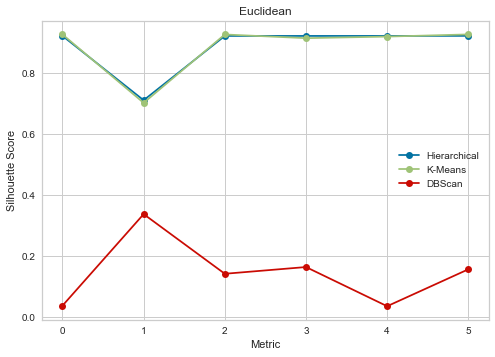

In [57]:
import matplotlib.pyplot as plt
plt.plot(sil_scores['EUCLIDEAN-HAC'], '-o', label='Hierarchical')
plt.plot(sil_scores['EUCLIDEAN-KM'], '-o', label='K-Means')
plt.plot(sil_scores['EUCLIDEAN-DB'], '-o', label='DBScan')
plt.ylabel('Silhouette Score')
plt.xlabel('Metric')
plt.legend()
plt.title('Euclidean')
plt.show()

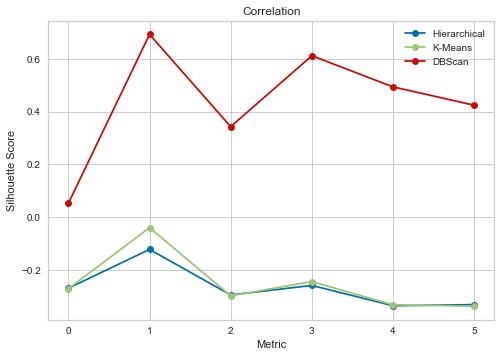

In [58]:
plt.plot(sil_scores['CORRELATION-HAC'], '-o', label='Hierarchical')
plt.plot(sil_scores['CORRELATION-KM'], '-o', label='K-Means')
plt.plot(sil_scores['CORRELATION-DB'], '-o', label='DBScan')
plt.ylabel('Silhouette Score')
plt.xlabel('Metric')
plt.legend()
plt.title('Correlation')
plt.show()

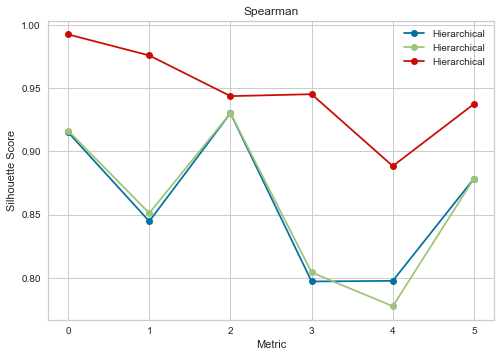

In [59]:
plt.plot(sil_scores['SPEARMAN-HAC'], '-o', label='Hierarchical')
plt.plot(sil_scores['SPEARMAN-KM'], '-o', label='Hierarchical')
plt.plot(sil_scores['SPEARMAN-DB'], '-o', label='Hierarchical')
plt.ylabel('Silhouette Score')
plt.xlabel('Metric')
plt.legend()
plt.title('Spearman')
plt.show()

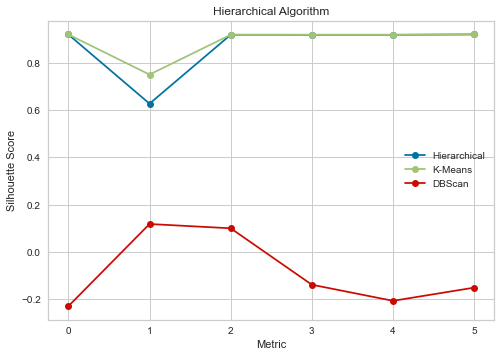

In [60]:
plt.plot(sil_scores['DTW-HAC'], '-o', label='Hierarchical')
plt.plot(sil_scores['DTW-KM'], '-o', label='K-Means')
plt.plot(sil_scores['DTW-DB'], '-o', label='DBScan')
plt.ylabel('Silhouette Score')
plt.xlabel('Metric')
plt.legend()
plt.title('Hierarchical Algorithm')
plt.show()